## 四阶龙格库塔法

### 第一次尝试

$$\left\{\begin{matrix}\dot{x}=\sigma (y-x) \\ \dot{y} = (\mu-z)x-y \\ \dot{z} = xy - \rho z \end{matrix} \right.$$

$$ x(0)=1 \\  y(0) = 2 \\ z(0) = 3 \\ \sigma=10 \\ \mu=28 \\ \rho=8/3$$

C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:22: RuntimeWarning: overflow encountered in double_scalars
  k32 = (x[i] + 1 / 2 * h * k11) * (y[i] + 1 / 2 * h * k21) - r * (z[i] + 1 / 2 * h * k31)
C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:26: RuntimeWarning: overflow encountered in double_scalars
  k33 = (x[i] + h / 2 * k12) * (y[i] + h / 2 * k22) - r * (z[i] + 1 / 2 * h * k32)
C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:33: RuntimeWarning: invalid value encountered in double_scalars
  yn = y[i] + h / 6 * (k21 + 2 * k22 + 2 * k23 + k24)
C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:34: RuntimeWarning: invalid value encountered in double_scalars
  zn = z[i] + h / 6 * (k31 + 2 * k32 + 2 * k33 + k34)


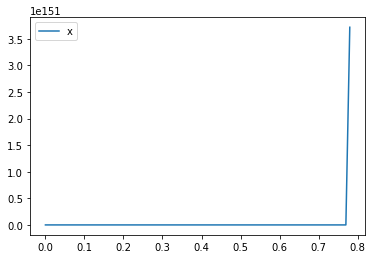

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1], dtype=np.float64)
y = np.array([2], dtype=np.float64)
z = np.array([3], dtype=np.float64)
X = np.array([[2], [1]])  # 给定初始值

s = 10.0
m = 28.0
r = 8 / 3
h = 0.01  # 步长
t = np.arange(0, 10, h)  # 仿真时间

for i, _ in enumerate(t):
    k11 = s * (x[i] - y[i])
    k21 = (m - z[i]) - y[i]
    k31 = x[i] * y[i] - r * z[i]

    k12 = s * ((x[i] + 1 / 2 * h * k11) - (y[i] + 1 / 2 * h * k21))
    k22 = (m - z[i] + 1 / 2 * h * k31) - (y[i] + 1 / 2 * h * k21)
    k32 = (x[i] + 1 / 2 * h * k11) * (y[i] + 1 / 2 * h * k21) - r * (z[i] + 1 / 2 * h * k31)

    k13 = s * ((x[i] + 1 / 2 * h * k12) - (y[i] + h / 2 * k22))
    k23 = (m - (z[i] + h / 2 * k32)) - (y[i] + 1 / 2 * h * k22)
    k33 = (x[i] + h / 2 * k12) * (y[i] + h / 2 * k22) - r * (z[i] + 1 / 2 * h * k32)

    k14 = s * ((x[i] + 1 / 2 * h * k13) - (y[i] + h / 2 * k23))
    k24 = (m - (z[i] + h / 2 * k33)) - (y[i] + 1 / 2 * h * k23)
    k34 = (x[i] + h / 2 * k13) * (y[i] + h / 2 * k23) - r * (z[i] + 1 / 2 * h * k33)

    xn = x[i] + h / 6 * (k11 + 2 * k12 + 2 * k13 + k14)
    yn = y[i] + h / 6 * (k21 + 2 * k22 + 2 * k23 + k24)
    zn = z[i] + h / 6 * (k31 + 2 * k32 + 2 * k33 + k34)
    #     print(xn)
    x = np.append(x, xn)
    y = np.append(y, yn)
    z = np.append(z, zn)
#     print(x)

x1 = y.copy()
x1 = np.array(x1)
x = np.array(x)
x2 = x1 - 1.1 * x1 + 3.0 * x
plt.plot(t, x2[:-1], label='x')
plt.legend()
plt.show()

In [28]:
for i in x: print(i)

1.0
0.8858624559375
0.7360007212117295
0.546864873014508
0.3145329725716479
0.03467051452776748
-0.2975146666269566
-0.6873225400530629
-1.1406166365085622
-1.6638860496123213
-2.264314381265403
-2.94985641266782
-3.729323372715391
-4.612477776961596
-5.6101389242878845
-6.734300266690471
-7.998260012199948
-9.416766484288988
-11.006179946002487
-12.784652806788033
-14.772330368567337
-16.991574539703112
-19.46721325687692
-22.22681871240084
-25.301017896551244
-28.72383944146087
-32.53310130769646
-36.77084450276949
-41.48381878239707
-46.72402718551943
-52.54933732493558
-59.02416863806368
-66.22026634995908
-74.21757478269402
-83.10522495271506
-92.98265425175366
-103.96087956893697
-116.16394969995832
-129.73060860015784
-144.81620837934204
-161.5949204712546
-180.26230592861114
-201.03832240915776
-224.17086771706605
-249.93999003406185
-278.6629365448863
-310.70026993102545
-346.4633634678908
-386.4237012009852
-431.12457665954514
-481.1960277117986
-537.3742071239849
-600.526932

In [12]:
y - x

array([1.        , 1.33333829, 1.69975166, ...,        nan,        nan,
              nan])

In [13]:
y

[2,
 2.229044536875,
 2.456399064711911,
 2.6820651670809634,
 2.906058061369754,
 3.128409280015593,
 3.34916962305981,
 3.568412418952363,
 3.786237136281226,
 4.002773395943783,
 4.218185441452833,
 4.432677134870691,
 4.646497557655926,
 4.859947309943643,
 5.0733856190315345,
 5.287238388824968,
 5.502007347604579,
 5.718280482854138,
 5.936743990461094,
 6.158196013200185,
 6.38356250235319,
 6.613915609570753,
 6.850495107447019,
 7.094733451646087,
 7.3482852411092745,
 7.613062014077422,
 7.89127354705493,
 8.18547711538246,
 8.498636546123068,
 8.834193370737575,
 9.196152998702452,
 9.589189626744249,
 10.018774629345097,
 10.491334522370238,
 11.014446358635347,
 11.59708074613404,
 12.249905774624839,
 12.985669268429733,
 13.819682334346464,
 14.770434678829915,
 15.860382384137187,
 17.116962834827962,
 18.573910816615147,
 20.272976699050282,
 22.266185312154892,
 24.618827413394563,
 27.413451604497823,
 30.755233814481354,
 34.77926007424229,
 39.66049081161867,
 45.6

### 四阶龙格库塔法的第二次尝试
$$ \dot{x} = y + 3z +sin(5t)\\ \dot{y} = x+cos(t) \\ \dot{z} = x+z -3cos(3t)sin(4t) \\ 其中t\in[0, 1] \\ x(0)=y(0)=z(0

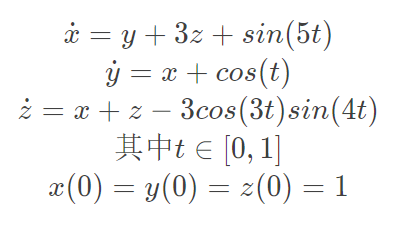
这个没问题

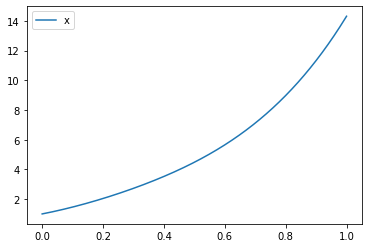

In [44]:
import numpy as np
import matplotlib.pyplot as plt

h = 1e-5  # 步长
t = np.arange(0, 1, h)
N = len(t)

x = np.ones(N)
y = np.ones(N)
z = np.ones(N)


for i, _ in enumerate(t[:-1]):
    x_n = x[i]
    y_n = y[i]
    z_n = z[i]
    t_n = t[i]

    kx1 = y_n + 3 * z_n + np.sin(5*t_n)
    ky1 = x_n + np.cos(t_n)
    kz1 = x_n + z_n - 3 * np.cos(3*t_n) * np.sin(4*t_n)

    kx2=(y_n+ky1*h/2)+3*(z_n+kz1*h/2)+np.sin(5*(t_n+h/2))
    ky2=(x_n+kx1*h/2)+np.cos(t_n+h/2)
    kz2=(x_n+kx1*h/2)+(z_n+kz1*h/2)-3*np.cos(3*(t_n+h/2))*np.sin(4*(t_n+h/2))
    
    kx3=(y_n+ky2*h/2)+3*(z_n+kz2*h/2)+np.sin(5*(t_n+h/2))
    ky3=(x_n+kx2*h/2)+np.cos(t_n+h/2)
    kz3=(x_n+kx2*h/2)+(z_n+kz2*h/2)-3*np.cos(3*(t_n+h/2))*np.sin(4*(t_n+h/2))
    
    kx4=(y_n+ky3*h)+3*(z_n+kz3*h)+np.sin(5*(t_n+h))
    ky4=(x_n+kx3*h)+np.cos(t_n+h)
    kz4=(x_n+kx3*h)+(z_n+kz3*h)-3*np.cos(3*(t_n+h))*np.sin(4*(t_n+h))
    
    x[i+1]=x_n+h/6*(kx1+2*kx2+2*kx3+kx4)
    y[i+1]=y_n+h/6*(ky1+2*ky2+2*ky3+ky4)
    z[i+1]=z_n+h/6*(kz1+2*kz2+2*kz3+kz4)

plt.plot(t, x, label='x')
# plt.plot(t, y, label='y')
# plt.plot(t, z, label='z')
plt.legend()
plt.show()
# print(x)

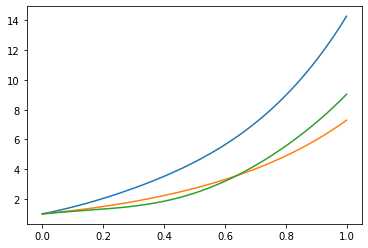

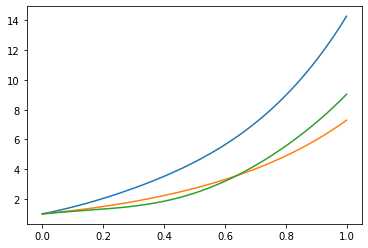

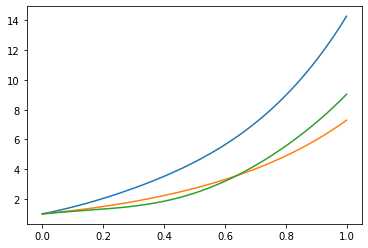

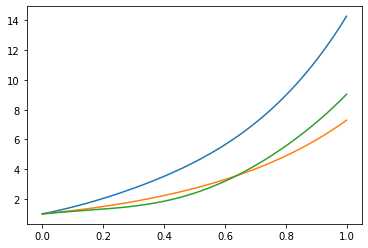

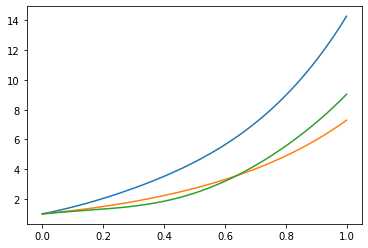

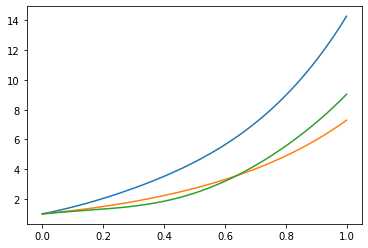

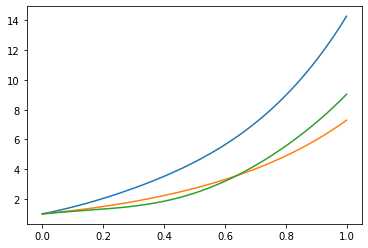

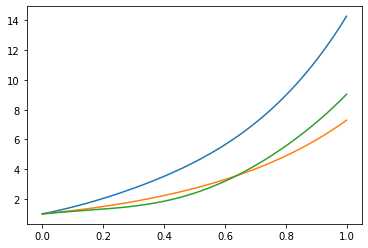

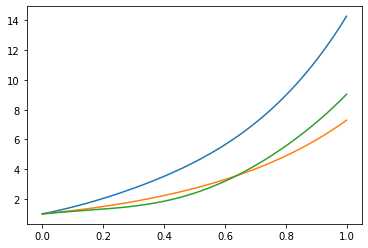

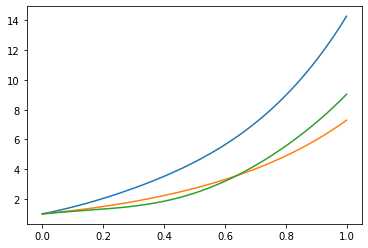

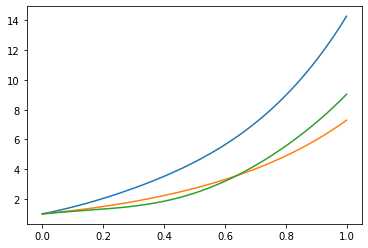

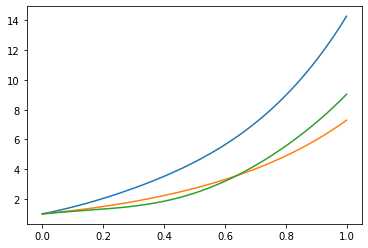

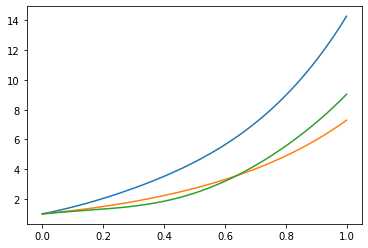

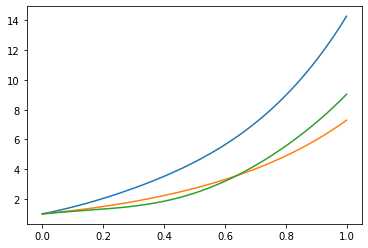

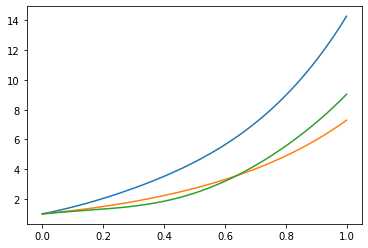

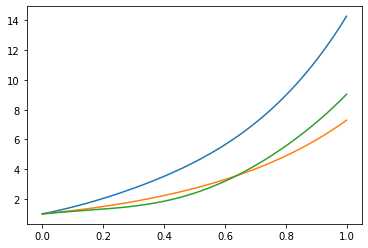

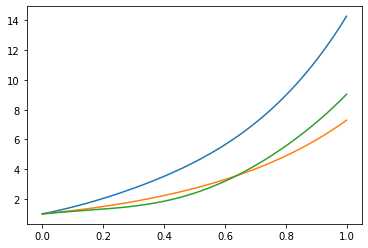

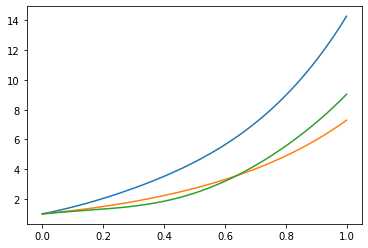

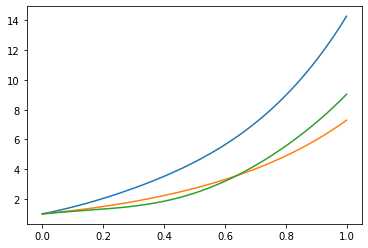

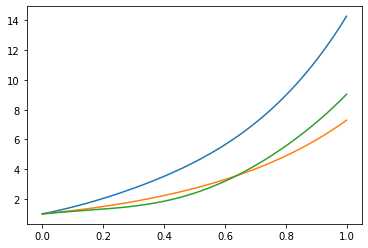

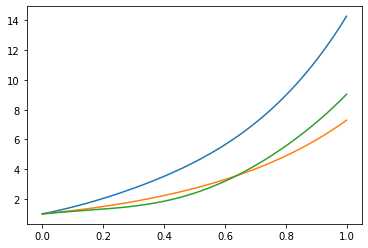

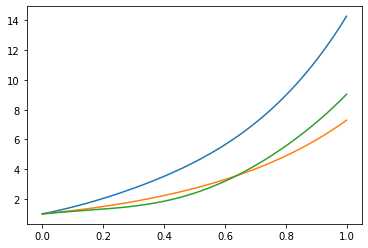

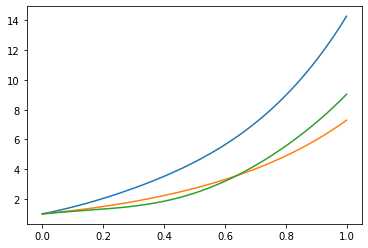

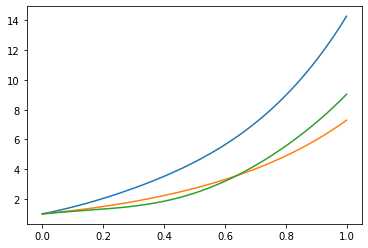

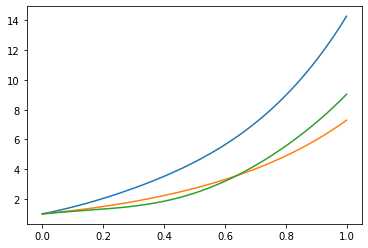

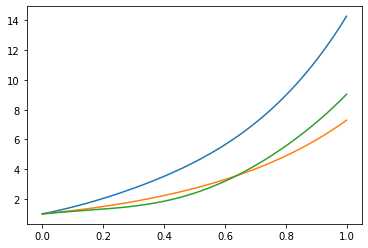

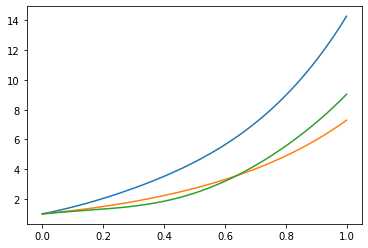

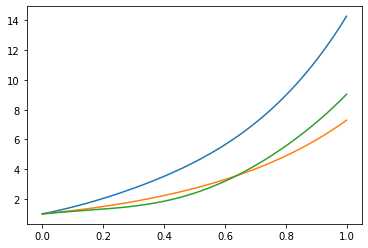

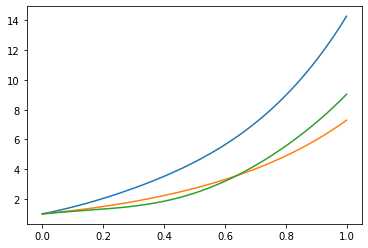

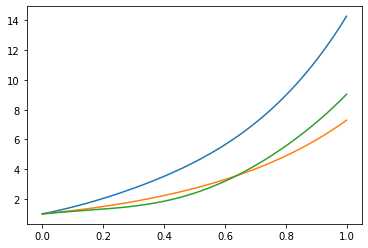

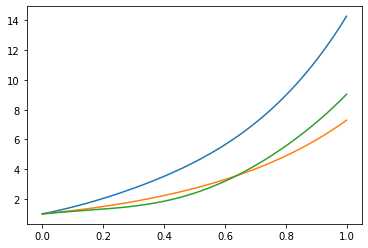

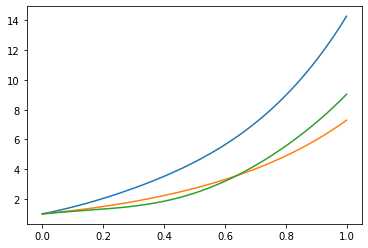

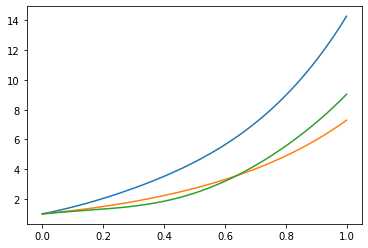

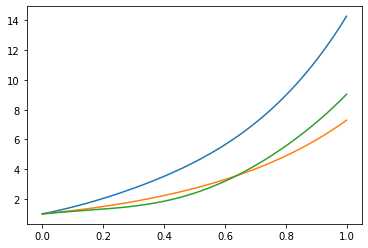

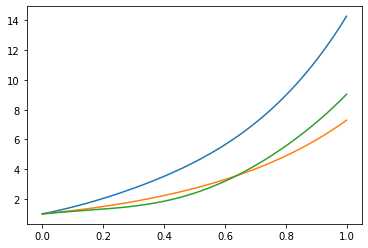

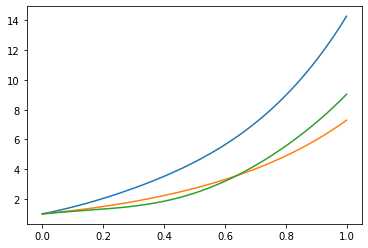

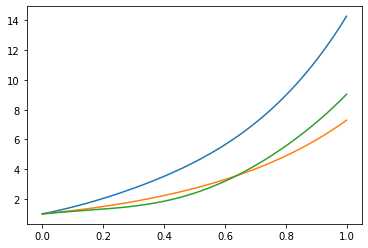

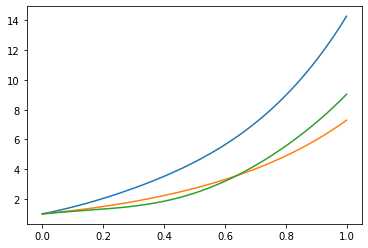

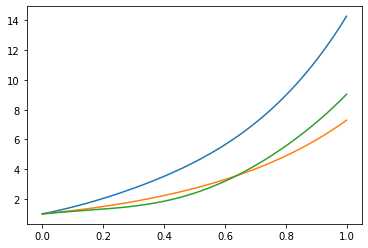

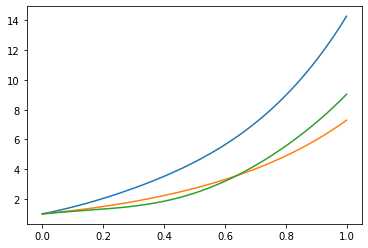

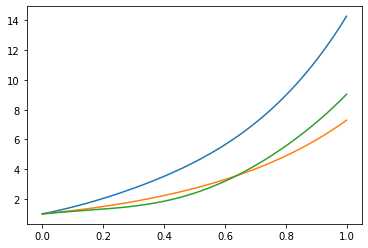

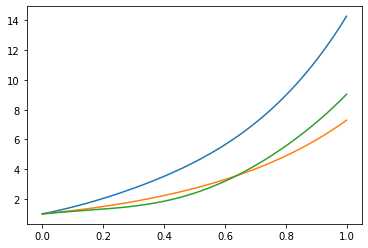

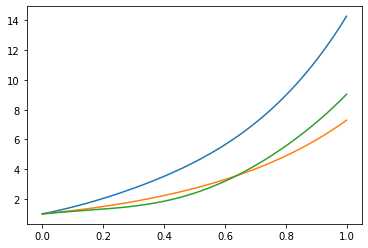

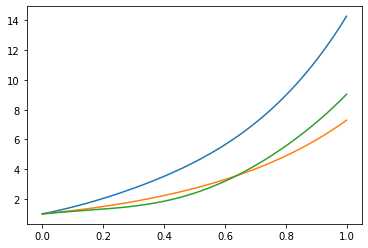

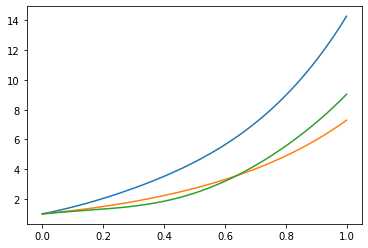

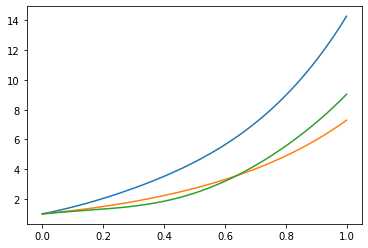

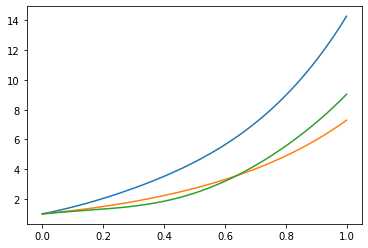

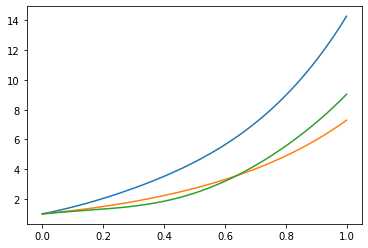

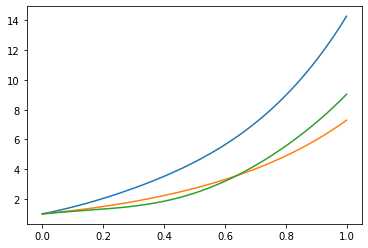

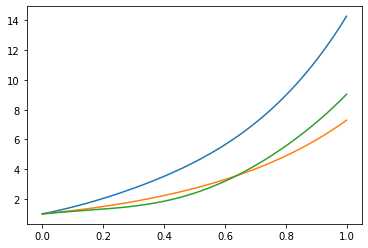

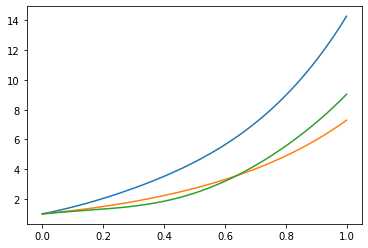

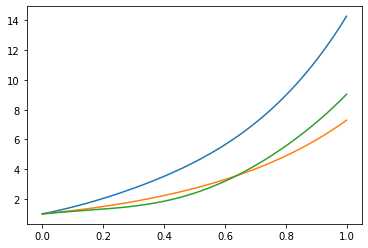

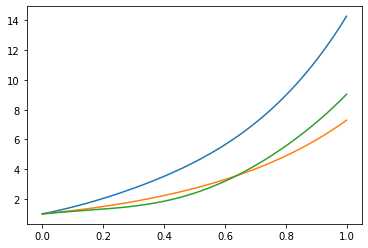

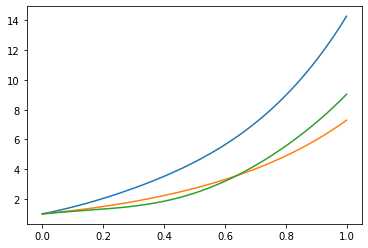

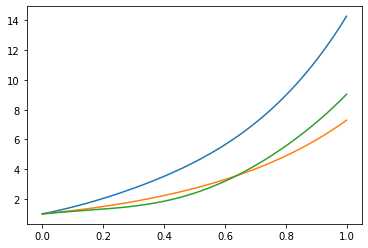

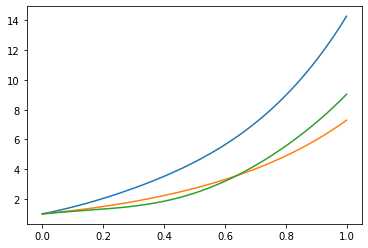

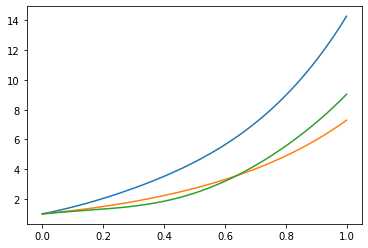

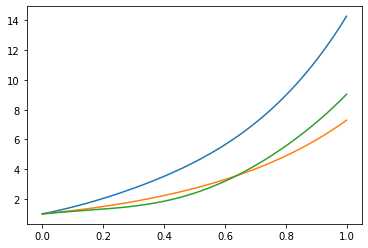

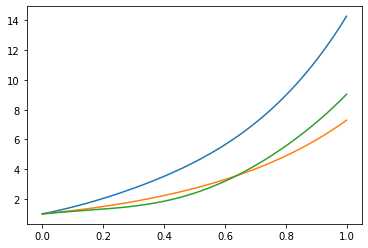

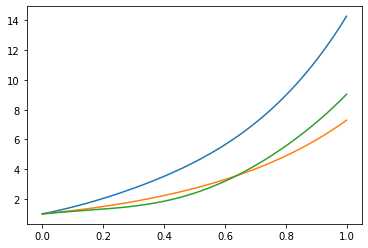

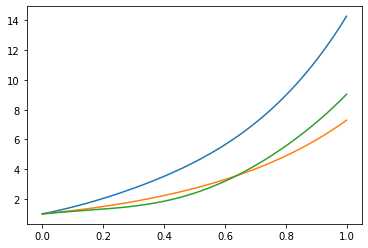

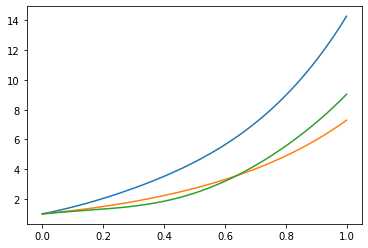

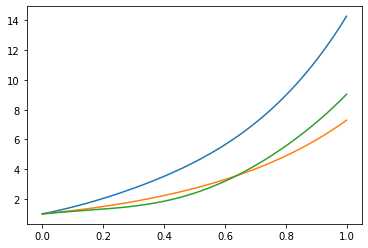

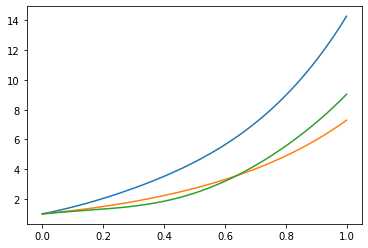

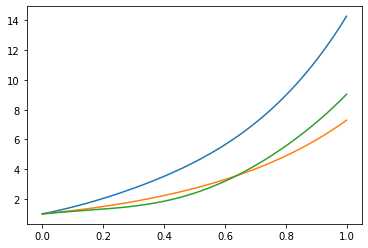

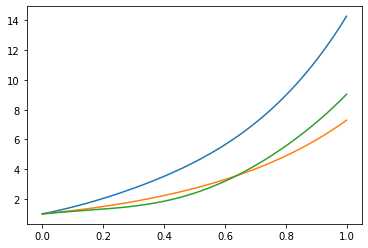

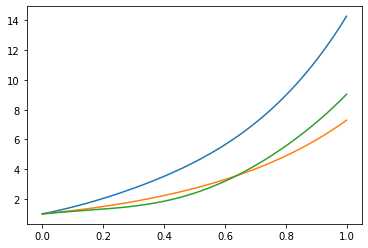

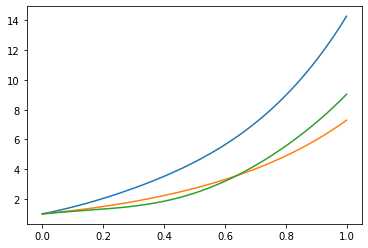

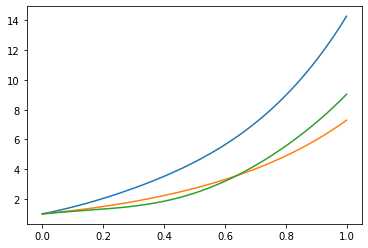

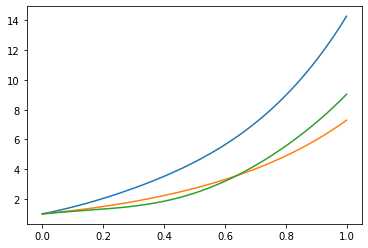

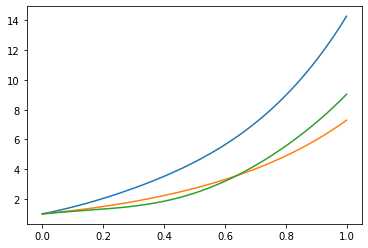

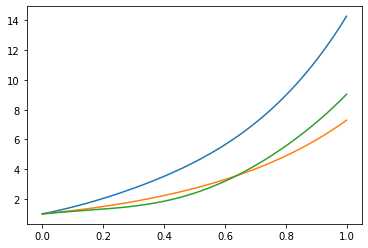

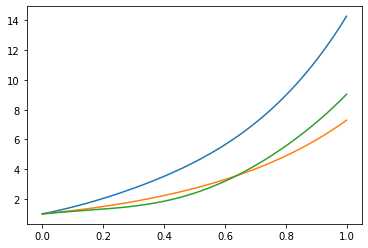

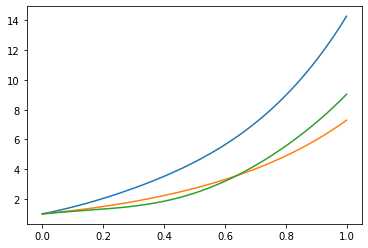

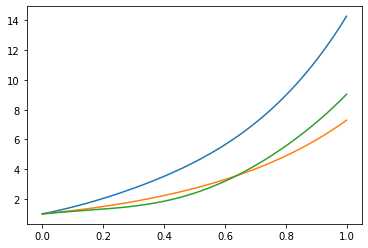

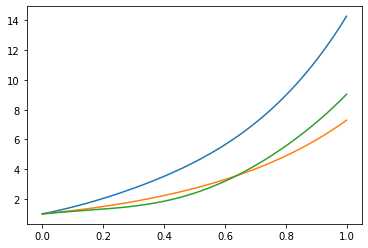

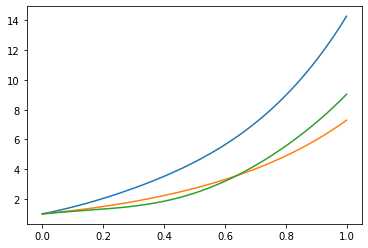

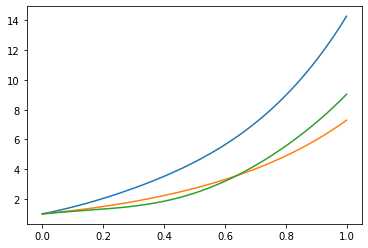

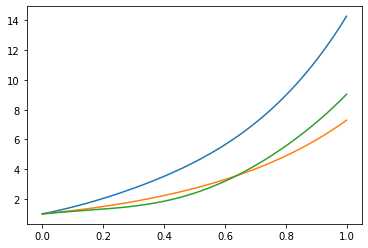

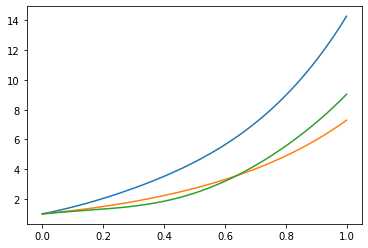

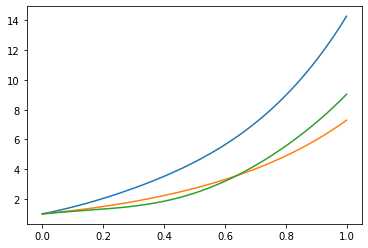

110 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
%%timeit
import numpy as np
import matplotlib.pyplot as plt

h = 1e-3  # 步长
t = np.arange(0, 1, h)
# print(t)
x = np.ones(len(t))
y = np.ones(len(t))
z = np.ones(len(t))  # 初始值设为1

for i, t_n in enumerate(t[: -1]):
    x_n = x[i]
    y_n = y[i]
    z_n = z[i]
    # t_n = t[i]
    
    kx1 = y_n + 3 * z_n + np.sin(5*t_n)
    ky1 = x_n + np.cos(t_n)
    kz1 = x_n + z_n - 3 * np.cos(3*t_n) * np.sin(4*t_n)
    
    kx2 = (y_n+h/2*ky1) + 3 * (z_n+h/2*kz1) + np.sin(5*(t_n+h/2))
    ky2 = (x_n+h/2*kx1) + np.cos(t_n+h/2)
    kz2 = (x_n+h/2*kx1) + (z_n+h/2*kz1) - 3 * np.cos(3*(t_n+h/2)) * np.sin(4*(t_n+h/2))
    
    kx3 = (y_n+h/2*ky2) + 3 * (z_n+h/2*kz2) + np.sin(5*(t_n+h/2))
    ky3 = (x_n+h/2*kx2) + np.cos(t_n+h/2)
    kz3 = (x_n+h/2*kx2) + (z_n+h/2*kz2) - 3 * np.cos(3*(t_n+h/2)) * np.sin(4*(t_n+h/2))
    
    kx4 = (y_n+h*ky3) + 3 * (z_n+h*kz3) + np.sin(5*(t_n+h))
    ky4 = (x_n+h*kx3) + np.cos(t_n+h)
    kz4 = (x_n+h*kx3) + (z_n+h*kz3) - 3 * np.cos(3*(t_n+h)) * np.sin(4*(t_n+h))
    
    x[i+1] = x_n + h / 6 * (kx1+2*kx2+2*kx3+kx4)
    y[i+1] = y_n + h / 6 * (ky1+2*ky2+2*ky3+ky4)
    z[i+1] = z_n + h / 6 * (kz1+2*kz2+2*kz3+kz4)
    
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.plot(t, z, label='z')
plt.show()

In [53]:
x

array([ 1.        ,  1.0040065 ,  1.00802598,  1.01205844,  1.01610385,
        1.02016221,  1.02423349,  1.02831769,  1.03241479,  1.03652477,
        1.04064763,  1.04478334,  1.04893189,  1.05309327,  1.05726746,
        1.06145444,  1.0656542 ,  1.06986673,  1.07409201,  1.07833003,
        1.08258076,  1.0868442 ,  1.09112032,  1.09540912,  1.09971057,
        1.10402467,  1.10835139,  1.11269072,  1.11704264,  1.12140714,
        1.12578421,  1.13017381,  1.13457595,  1.1389906 ,  1.14341775,
        1.14785738,  1.15230947,  1.15677401,  1.16125099,  1.16574038,
        1.17024217,  1.17475634,  1.17928288,  1.18382177,  1.18837299,
        1.19293653,  1.19751237,  1.20210049,  1.20670088,  1.21131352,
        1.2159384 ,  1.22057549,  1.22522478,  1.22988626,  1.23455991,
        1.2392457 ,  1.24394363,  1.24865368,  1.25337583,  1.25811006,
        1.26285636,  1.26761471,  1.2723851 ,  1.2771675 ,  1.2819619 ,
        1.28676829,  1.29158665,  1.29641695,  1.30125919,  1.30

In [37]:
y

array([1.        , 1.001997  , 1.003986  , 1.00596698, 1.00793992,
       1.00990482, 1.01186166, 1.01381042, 1.0157511 , 1.01768367,
       1.01960814, 1.02152448, 1.02343269, 1.02533275, 1.02722466,
       1.0291084 , 1.03098398, 1.03285137, 1.03471057, 1.03656158,
       1.03840439, 1.04023898, 1.04206536, 1.04388352, 1.04569346,
       1.04749516, 1.04928864, 1.05107387, 1.05285086, 1.05461962,
       1.05638012, 1.05813238, 1.0598764 , 1.06161217, 1.06333969,
       1.06505896, 1.06676999, 1.06847278, 1.07016732, 1.07185363,
       1.0735317 , 1.07520154, 1.07686315, 1.07851653, 1.0801617 ,
       1.08179866, 1.08342741, 1.08504796, 1.08666032, 1.08826449,
       1.08986049, 1.09144832, 1.09302799, 1.09459951, 1.09616289,
       1.09771814, 1.09926528, 1.10080431, 1.10233525, 1.10385811,
       1.1053729 , 1.10687963, 1.10837833, 1.109869  , 1.11135166,
       1.11282633, 1.11429302, 1.11575175, 1.11720253, 1.11864539,
       1.12008034, 1.1215074 , 1.12292659, 1.12433793, 1.12574

In [38]:
t

0.998